<< Python Jupyter Notebook Course Project Demo >>

COGSCI 88 - Data Science and The Mind (Yang Xu)

Demo code for analyzing the World Color Survey (WCS)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

==================================================================

  Courtesy of Vasilis Oikonomou, Joshua Abbott, & Jessie Salas
  
  $\alpha$-tested by Elva Xinyi Chen  
  
  Copyright @ 2016, UC Berkeley

==================================================================

Prerequisites for running this demo notebook:

1) Install Python Jupyter Notebook (v3.5)

2) Place data folder "WCS_data_core" under the same directory (as this demo notebook)
   
   "WCS_data_core" includes a core subset of the WCS data archive that would be sufficient for most analytical purposes

3) Place helper function file "wcs_helper_functions.py" under the same directory

In [1]:
# Import helper function file for WCS data analysis
from wcs_helper_functions import *

# Import generic Python libraries
import numpy as np
from scipy import stats
from random import random
from datascience import *
%matplotlib inline

> Demo 1: Import stimulus (color chip) information in Munsell space

> Stimuli were 330 color chips in Munsell space, each defined along lightness (alphabet) and hue (integer) dimensions

In [2]:
# Load chip information
chipInfo = readChipData('./WCS_data_core/chip.txt');

# Stimuli can be represented in numerical index (key)-coordinate (value) pairs
indexCoord = chipInfo[1]

# For example, to access Munsell coordinate for chip with numerical index [1]:
print(indexCoord[1])

# Uncomment following to display full stimulus information (long)
#print(chipInfo[1])

('E', '29')


In [3]:
# Alternatively, they can also be represented in coordinate (key)-index (value) pairs
coordIndex = chipInfo[0];

# For example, to access numerical index for color chip in Munsell coordinate D-11:
print(coordIndex['D11']);

# Uncomment following to display full stimulus information (long)
#print(chipInfo[0]); 

258


> Demo 2: Import stimulus information in CIELAB space

> Each of the 330 stimuli is also defined in 3D CIELAB space, where the dimensions are l (lightness), a, & b (opponency)

In [4]:
# Load CIELAB information
cielabInfo = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')

# For example, to obtain the cielab coordinates for chip [1]:
print(cielabInfo[1])

('61.70', '-4.52', '-39.18')


> Demo 3: Import color naming data
    
> Each of 330 color chips was named by speakers of 110 different languages

In [3]:
# Load naming data
namingData = readNamingData('./WCS_data_core/term.txt');

# For example, to obtain naming data for [language 1] [speaker 1]:
namingData[1][1]; # Uncomment semicolon to display data in full (long)

# 1-330 index colors in Munsell space, each described by an abbreviated term by that speaker and language

> Demo 4: Import color foci data
    
> Apart from naming the color chips, each speaker also pointed to foci color chips for each color term they had used

In [6]:
# Load foci data
fociData = readFociData('./WCS_data_core/foci-exp.txt');

# For example, to obtain foci data for [language 1] [speaker 1]:
fociData[1][1]

# Each entry shows the foci location(s) for a given term, e.g. foci for term 'F' is located at D-25 in the Munsell chart

{'F': ['D:25'],
 'G': ['F:17'],
 'LB': ['J:0'],
 'LE': ['F:1', 'F:2', 'F:3', 'G:1', 'G:2', 'G:3'],
 'LF': ['A:0'],
 'WK': ['D:9', 'D:10', 'D:11', 'D:12']}

> Demo 5: Import speaker demographic information

> For most speakers in the WCS survey, their age (integer) and gender (M/F) information were recorded

In [7]:
# Load speaker information
speakerInfo = readSpeakerData('./WCS_data_core/spkr-lsas.txt')

# To access (age, gender) information for all speakers of [language 1]
print(speakerInfo[1])

[('90', 'M'), ('26', 'M'), ('38', 'M'), ('35', 'M'), ('80', 'M'), ('48', 'M'), ('26', 'M'), ('39', 'M'), ('47', 'F'), ('49', 'M'), ('40', 'F'), ('45', 'M'), ('50', 'M'), ('30', 'M'), ('21', 'M'), ('60', 'F'), ('32', 'M'), ('67', 'M'), ('15', 'M'), ('42', 'M'), ('40', 'M'), ('47', 'M'), ('23', 'F'), ('45', 'F'), ('30', 'F')]


In [8]:
# For example, to obtain age and gender for the 10th speaker of [language 1]
age = speakerInfo[1][9][0]; print(age)
gender = speakerInfo[1][9][1]; print(gender)

49
M


> Demo 6: Visualize color naming from an individual speaker

> Naming patterns from a speaker can be visualized in the stimulus palette (Munsell coordinates)

In [28]:
namingDictionary = readNamingData('./WCS_data_core/term.txt')
language1_speaker1 = namingDictionary[61][1]

In [29]:
terms = language1_speaker1.values()
encoded_terms = map_array_to(terms, generate_random_values(terms))

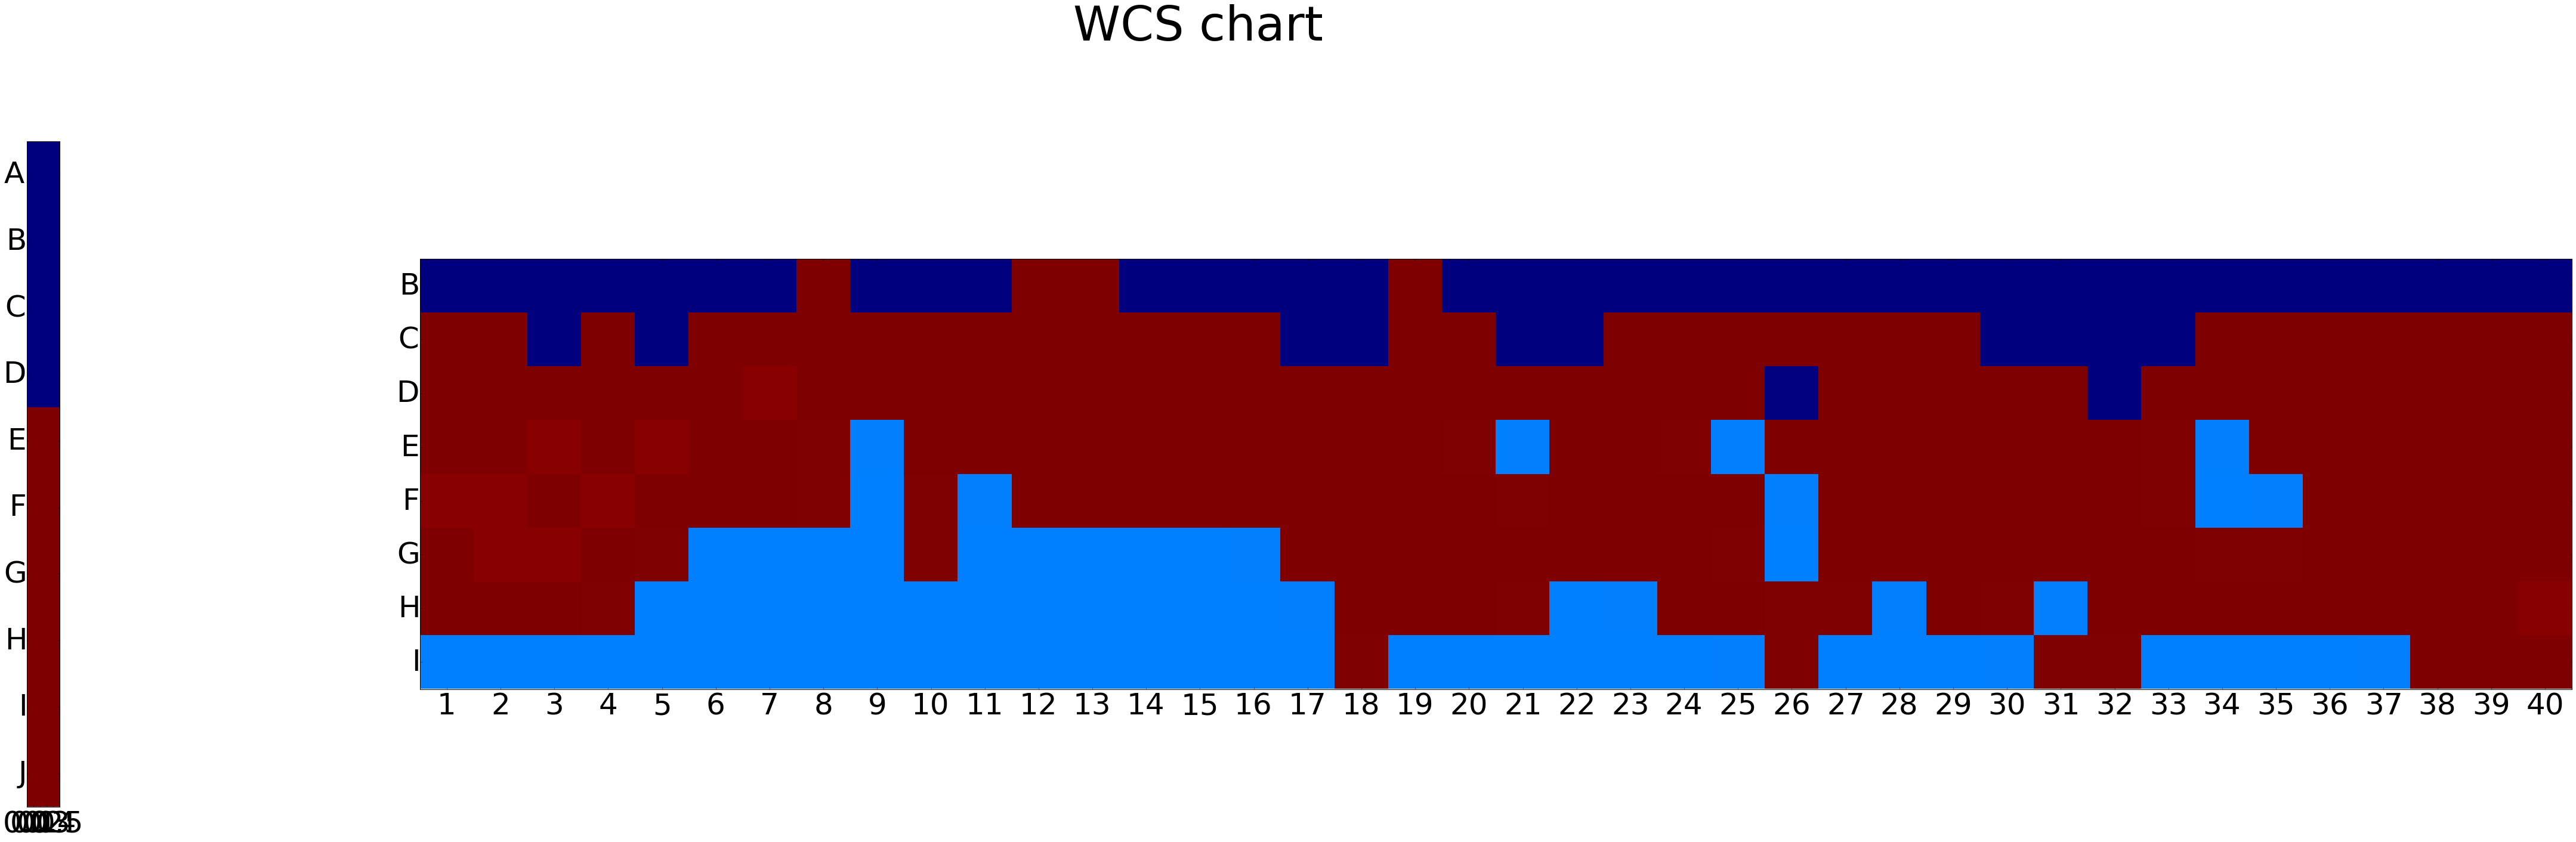

In [30]:
plotValues(encoded_terms)

> Demo 7: Visualize modal color naming in a given language

> Furthermore, aggregated (modal) naming patterns from a language can also be visualized in the same space

In [10]:
#How people named chips WARNING: namingDictionary is very large. Do not attempt to print it
namingDictionary = readNamingData('./WCS_data_core/term.txt')

In [11]:
#Select language 61 and put the data into a datascience Table
language61_dict = namingDictionary[61]

keys = language61_dict.keys()
for i in list(keys): 
    language61_dict[str(i)] =list(language61_dict[i].values())
    del language61_dict[i]

In [12]:
#column names are STRINGS and represent the speaker numbers
# Each row represents the ith chip. E.G. the 1st row are responses for chip 1
language61 = Table().with_columns(language61_dict) 

In [13]:
#responses for 1st chip
language61.take(0)

8,1,12,6,5,15,14,13,10,3,11,2,9,4,7
LE,LE,LE,LE,LE,DU,LE,DU,LE,DU,LE,ND,LE,LE,LE


In [14]:
#put all responses in one array
responses_chip1 = np.array(language61.row(0))
print(responses_chip1)
print("Mode answer: "+stats.mode(responses_chip1)[0][0])

['LE' 'LE' 'LE' 'LE' 'LE' 'DU' 'LE' 'DU' 'LE' 'DU' 'LE' 'ND' 'LE' 'LE' 'LE']
Mode answer: LE


In [15]:
#take modes for each row
modes = []
for i in range(0, language61.num_rows):
    row = np.array(language61.row(i))
    modes.append(stats.mode(row)[0][0])

In [16]:
#minor functions that might help
encoded_terms = map_array_to(modes, generate_random_values(modes))

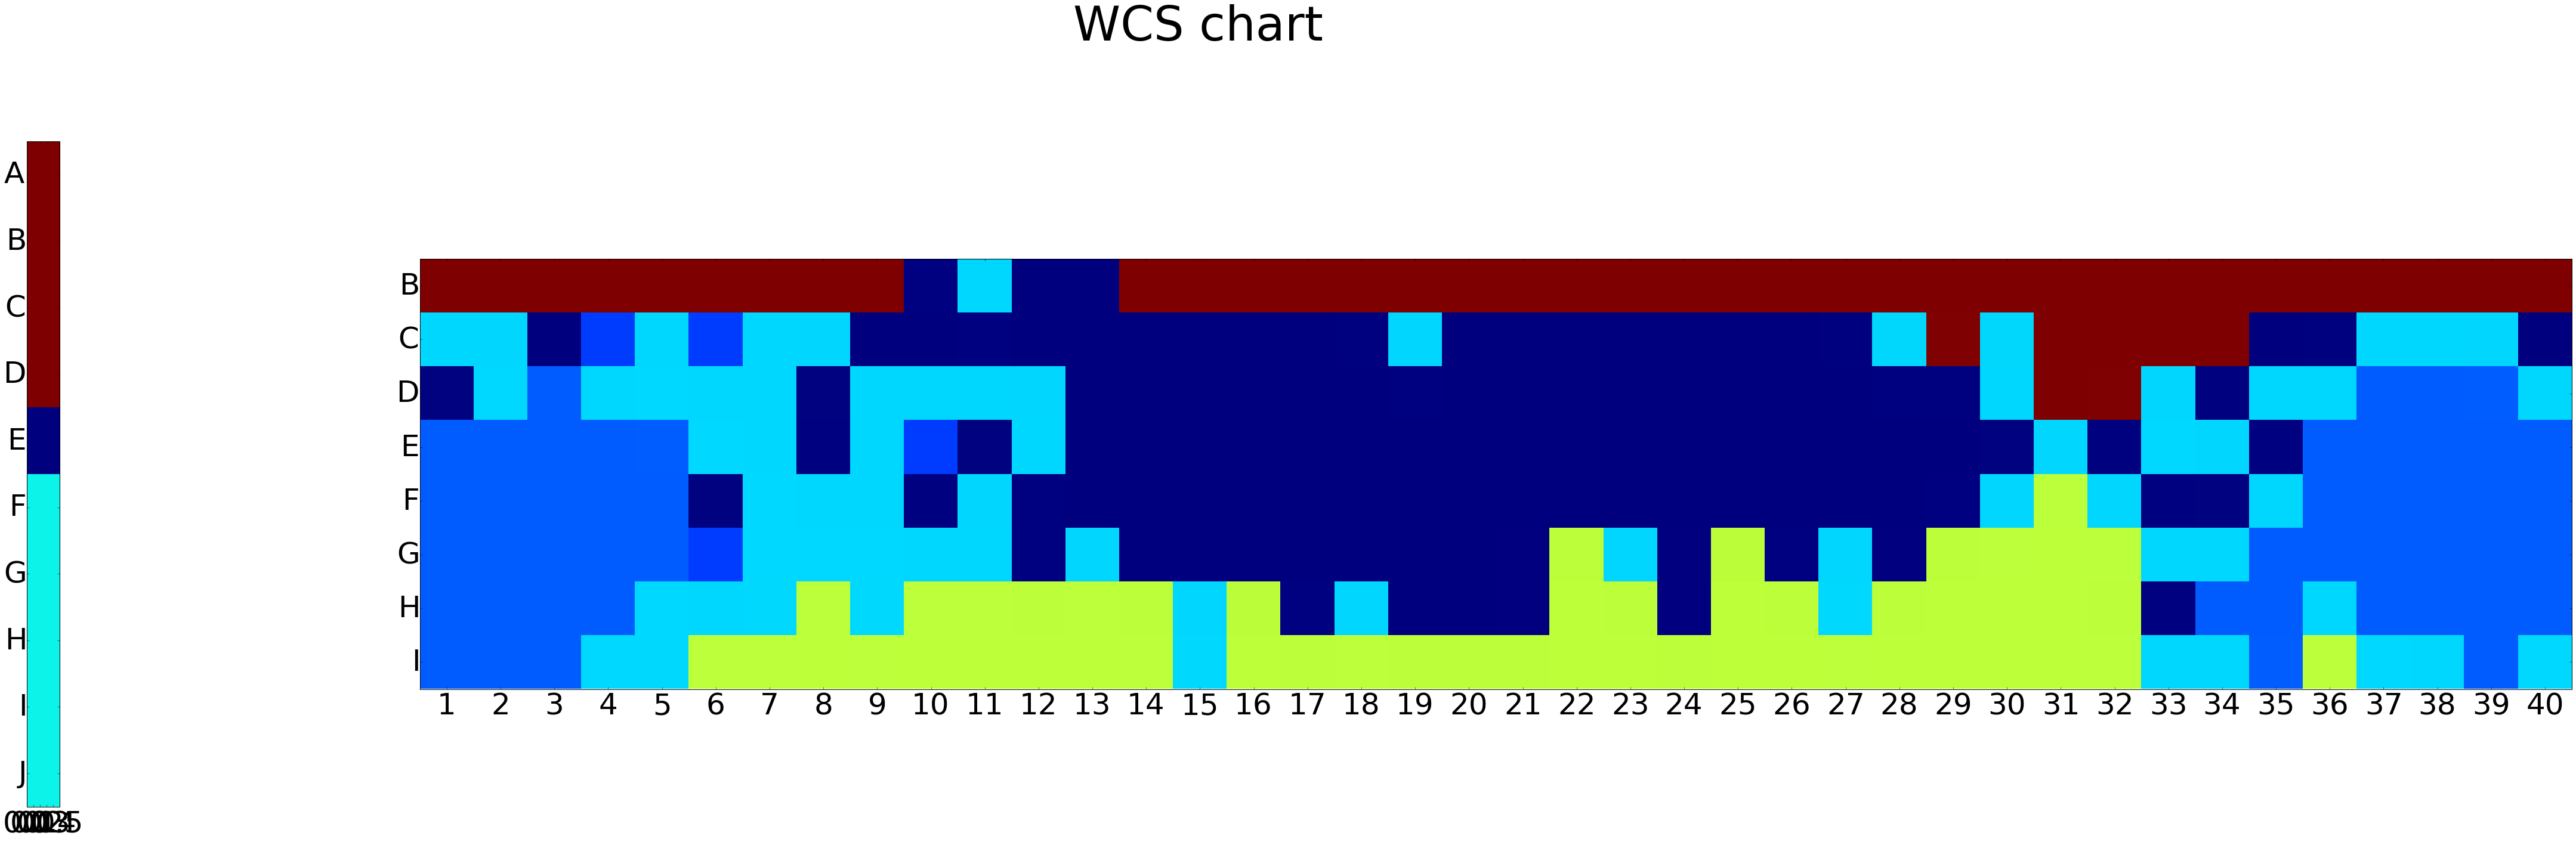

In [17]:
plotValues(encoded_terms)